# Three machine nine bus system

The model of Three Machine Nine Bus system in the full version including the differental equations of synchronous machines, IEEE type 1 exciter system and turbine and speed governor system, and algebraic equation of stators, network balances and power contro.

**Differential equations**

synchronus machine:
\begin{align}
%
    T'_{qoi}\frac{\text{d} E'_{di}}{\text{d} t} &= -E'_{di} + (X_{qi} - X'_{qi})I_{qi} \label{eq: 1a}\\
%
  T'_{doi}\frac{\text{d} E'_{qi}}{\text{d} t} &= -E'_{qi} - (X_{di} - X'_{di})I_{di} + E_{fdi}  \label{eq: 1b}\\
  %
    \frac{\text{d} \delta_{i}}{\text{d} t} & = \omega_{i} - \omega_{s}  \label{eq: 1c}\\
%
    \frac{2H_{i}}{\omega_{s}} \frac{\text{d} \omega_{i}}{\text{d} t} &= T_{Mi} - E'_{di}I_{di} -  E'_{qi}I_{qi}- (X'_{qi}-X'_{di})I_{di}I_{qi} - D_{i}(\omega_{i}-\omega_{s})  \label{eq: 1d}\\
   & \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \forall i= 1, \ldots, m \nonumber.
\end{align}
IEEE type 1 exciter:
\begin{align}  
    T_{Ei}\frac{\text{d} E_{fdi}}{\text{d} t} & = -(K_{Ei}+S_{Ei}(E_{fdi}))E_{fdi}+V_{Ri} \label{eq: 1e}\\
%
    T_{Fi}\frac{\text{d} R_{fi}}{\text{d} t} & = - R_{fi}+\frac{K_{Fi}}{T_{Fi}} E_{fdi} \label{eq: 1f}
\\
    T_{Ai}\frac{\text{d} V_{Ri}}{\text{d} t} & = -V_{Ri}+K_{Ai}R_{fi} -\frac{K_{Ai}K_{Fi}}{T_{Fi}}E_{fdi}+K_{Ai}(V_{refi}-V_{i})  \label{eq: 1g}\\
   & \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \forall i= 1, \ldots, m \nonumber.
\end{align}
Turbine and speed governor system
\begin{align}
    & T_{CHi} \frac{\text{d} T_{Mi}}{\text{d} t} = -T_{Mi} + P_{SVi} \label{eq: 4a} \\
    %
    & T_{SVi}\frac{\text{d} P_{SVi}}{\text{d} t}  = -P_{SVi} + P_{Ci} - \frac{1}{R_{Di}} \left(\frac{\omega_{i}}{\omega_{s}} - 1  \right) \label{eq: 4b}  \\
    %
    & \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \forall i= 1, \ldots, m, \nonumber
\end{align}

**Algebraic equations**

Stator equations:
\begin{align}
    E'_{di}-V_{i}\sin(\delta_{i}-\theta_i)+X'_{qi}I_{qi} = 0 \label{eq: 2a}\\
%
    E'_{qi}-V_{i}\cos(\delta_{i}-\theta_i)-X'_{di}I_{di} = 0
    \label{eq: 2b}\\
%
    \forall  i=1,\ldots,m, \notag
\end{align}
Network balances: for m buses with synchronous machine:
\begin{align}
I_{di}V_{i}\sin(\delta_{i}-\theta_{i})+I_{qi}V_{i}\cos(\delta_{i}-\theta_{i})  -P_{Li}
    =\sum^{n}_{k=1}V_{i}V_{k}Y_{ik}\cos(\theta_{i}-\theta_{k}-\alpha_{ik})\label{eq: 3a}\\
%   
    I_{di}V_{i}\cos(\delta_{i} -\theta_{i})-I_{qi}V_{i}\sin(\delta_{i}-\theta_{i}) - Q_{Li}  =\sum^{n}_{k=1}V_{i}V_{k}Y_{ik}\sin(\theta_{i}-\theta_{k}-\alpha_{ik}) \label{eq: 3b} \\
    \quad \quad \quad \quad i = 1,\ldots,m, \nonumber
\end{align}
for $n - m$ remaining load buses:
\begin{align}
-P_{Li} =  \sum^{n}_{k=1} V_{i}V_{k}Y_{ik}\cos(\theta_{i}-\theta_{k}-\alpha_{ik}) \label{eq: 3c}\\
%
    -Q_{Li}  = \sum^{n}_{k=1} V_{i}V_{k}Y_{ik}\sin(\theta_{i}-\theta_{k}-\alpha_{ik}) \label{eq: 3d} \\
     i = m+1,\ldots,n. \nonumber
\end{align}
Power control:
\begin{equation}
P_{Ci} = P^{0}_{Ci} + k^{pf}_i Z, \quad \qquad \forall i = 1, \ldots, m,
    \label{eq: 5}
\end{equation}

In [1]:
using QuDiffEq                # package containt quantum computing' solvers.
using OrdinaryDiffEq          # package containt solvers to solve ODEs.
using ModelingToolkit         # package to convert DAEs to ODEs.
using DifferentialEquations   # package containt solvers to solve differential equations.
using Plots                   # package to plot the figure
using LaTeXStrings            # oackage to type LaTex in the Julia

#### Import data

In [2]:
using CSV               #package to load and save CSV files.
using DataFrames        #package to create dataframe from array.

#Load parameter for three machine nine bus system.
data = CSV.File("3gens.csv");

#### Define parameters and implement DAEs.

In [3]:
@variables t (Eq(t))[1:3] (Ed(t))[1:3] (delta(t))[1:3] (omega(t))[1:3] (Efd(t))[1:3] (Rf(t))[1:3] (Vr(t))[1:3]  # set of state variables
@variables (V(t))[1:9] (theta(t))[1:9] (Id(t))[1:3] (Iq(t))[1:3] (TM(t))[1:3] (Psv(t))[1:3] (Pc(t))[1:3]        # continuous of set of state variable
@parameters LP5 LQ5 LP6 LQ6 LP8 LQ8         # Set of active and reactive power at loads 5, 6 and 8.
D = Differential(t)                         # define the differential operator D by time t.
omega_s = 120*pi                            # reference speed.

# Total changing on loads
DL = LP5 + LQ5 + LP6 + LQ6 + LP8 + LQ8 + data["Load"][1] + data["Load"][2] + data["Load"][3]

#Sets of differential equations.
# Synchronous machine.
eq1 = [D(Eq[i]) ~ -(Eq[i] + (data["Xd"][i]-data["Xd'"][i])*Id[i] - Efd[i])/data["Tdo"][i] for i in 1:3]
#
eq2 = [D(Ed[i]) ~ -(Ed[i] - (data["Xq"][i]-data["Xq'"][i])*Iq[i])/data["Tqo"][i] for i in 1:3]
#
eq3 = [D(delta[i]) ~ omega[i]-omega_s for i in 1:3]
#
eq4 = [D(omega[i]) ~ -(-TM[i] + Ed[i]*Id[i] + Eq[i]*Iq[i] + (data["Xq'"][i]-data["Xd'"][i])*Id[i]*Iq[i])/(2*data["H"][i])*omega_s - 0.1*i*(omega[i]-omega_s) for i in 1:3]
#
# Exciter system
eq5 = [D(Efd[i]) ~  -((data["KE"][i] + 0.0039*exp(1.555*Efd[i]))*Efd[i] - Vr[i])/data["TE"][i] for i in 1:3]
#
eq6 = [D(Rf[i]) ~  -(Rf[i] + (- data["KF"][i]*Efd[i]/data["TF"][i]))/data["TF"][i] for i in 1:3]
#
eq7 = [D(Vr[i]) ~  -(Vr[i] - data["KA"][i]*Rf[i] + data["KA"][i]*data["KF"][i]*Efd[i]/data["TF"][i] - data["KA"][i]*(data["Vref"][i]-V[i]))/data["TA"][i] for i in 1:3]
#
# Turbine and speed governor system
eq8 = [D(TM[i]) ~ (-TM[i]+Psv[i])/data["TCH"][i] for i in 1:3]
#
eq9 = [D(Psv[i]) ~ (-Psv[i]+Pc[i]-(omega[i]/omega_s -1)/data["RD"][i])/data["TSV"][i] for i in 1:3]


#Stator equations
eq10 = [0~ Ed[i] - V[i]*sin(delta[i]-theta[i]) + data["Xq'"][i]*Iq[i]  for i in 1:3]
#
eq11 = [0~ Eq[i] - V[i]*cos(delta[i]-theta[i]) - data["Xd'"][i]*Id[i]  for i in 1:3]
#
# Network equations.
eq12 = [
    #Real power
    #bus 1
    0 ~ Id[1]*V[1]*sin(delta[1]-theta[1]) + Iq[1]*V[1]*cos(delta[1]-theta[1]) - 17.36*V[1]*V[4]*sin(theta[1]-theta[4]),
    #bus 2
    0 ~ Id[2]*V[2]*sin(delta[2]-theta[2]) + Iq[2]*V[2]*cos(delta[2]-theta[2]) - 16*V[2]*V[7]*sin(theta[2]-theta[7]),
    #bus 3
    0 ~ Id[3]*V[3]*sin(delta[3]-theta[3]) + Iq[3]*V[3]*cos(delta[3]-theta[3]) - 17.07*V[3]*V[9]*sin(theta[3]-theta[9]),
    #bus 4
    0 ~ (-17.36*V[4]*V[1]*sin(theta[4]-theta[1]) - 3.31*V[4]^2 + 1.36*V[4]*V[5]*cos(theta[4]-theta[5]) 
        - 11.6*V[4]*V[5]*sin(theta[4]-theta[5]) + 1.942*V[4]*V[6]*cos(theta[4]-theta[6]) - 10.51*V[4]*V[6]*sin(theta[4]-theta[6])),
    #bus 5
    0 ~ (LP5 + 1.36*V[5]*V[4]*cos(theta[5]-theta[4]) - 11.6*V[5]*V[4]*sin(theta[5]-theta[4]) + 1.19*V[5]*V[7]*cos(theta[5]-theta[7])
    - 5.97*V[5]*V[7]*sin(theta[5]-theta[7]) - 2.55*V[5]^2),
    #bus 6
    0 ~ (LP6 + 1.942*V[6]*V[4]*cos(theta[6]-theta[4]) - 10.51*V[6]*V[4]*sin(theta[6]-theta[4]) -3.22*V[6]^2 
        + 1.28*V[6]*V[9]*cos(theta[6]-theta[9]) - 5.59*V[6]*V[9]*sin(theta[6]-theta[9])),
    #bus 7
    0 ~ (-16*V[2]*V[7]*sin(theta[7]-theta[2]) + 1.19*V[7]*V[5]*cos(theta[7]-theta[5]) - 5.97*V[7]*V[5]*sin(theta[7]-theta[5])
        -2.8*V[7]^2 + 1.62*V[7]*V[8]*cos(theta[7]-theta[8]) - 13.7*V[7]*V[8]*sin(theta[7]-theta[8])),
    #bus 8
    0 ~ (LP8 + 1.62*V[8]*V[7]*cos(theta[8]-theta[7]) - 13.7*V[8]*V[7]*sin(theta[8]-theta[7]) - 2.77*V[8]^2
    + 1.16*V[8]*V[9]*cos(theta[8]-theta[9]) - 9.78*V[8]*V[9]*sin(theta[8]-theta[9])),
    #bus 9
    0 ~ (-2.4*V[9]^2 - 17.07*V[9]*V[3]*sin(theta[9]-theta[3]) + 1.28*V[9]*V[6]*cos(theta[9]-theta[6]) - 5.59*V[9]*V[6]*sin(theta[9]-theta[6])
        + 1.16*V[9]*V[8]*cos(theta[9]-theta[8]) - 9.78*V[9]*V[8]*sin(theta[9]-theta[8])),
    #Reactive power
    #bus 1
    0 ~ Id[1]*V[1]*cos(delta[1]-theta[1]) - Iq[1]*V[1]*sin(delta[1]-theta[1]) + 17.36*V[1]*V[4]*cos(theta[1]-theta[4]) - 17.36*V[1]^2,
    #bus 2
    0 ~ Id[2]*V[2]*cos(delta[2]-theta[2]) - Iq[2]*V[2]*sin(delta[2]-theta[2]) + 16*V[2]*V[7]*cos(theta[2]-theta[7]) - 16*V[2]^2,
    #bus 3
    0 ~ Id[3]*V[3]*cos(delta[3]-theta[3]) - Iq[3]*V[3]*sin(delta[3]-theta[3]) + 17.07*V[3]*V[9]*cos(theta[3]-theta[9]) - 17.07*V[3]^2,
    #bus 4
    0 ~ (17.36*V[4]*V[1]*cos(theta[4]-theta[1]) - 39.3*V[4]^2 + 1.36*V[4]*V[5]*sin(theta[4]-theta[5]) 
        + 11.6*V[4]*V[5]*cos(theta[4]-theta[5]) + 1.942*V[4]*V[6]*sin(theta[4]-theta[6]) + 10.51*V[4]*V[6]*cos(theta[4]-theta[6])),
    #bus 5
    0 ~ (LQ5 + 1.36*V[5]*V[4]*sin(theta[5]-theta[4]) + 11.6*V[5]*V[4]*cos(theta[5]-theta[4]) + 1.19*V[5]*V[7]*sin(theta[5]-theta[7])
    + 5.97*V[5]*V[7]*cos(theta[5]-theta[7]) - 17.34*V[5]^2),
    #bus 6
    0 ~ (LQ6 + 1.942*V[6]*V[4]*sin(theta[6]-theta[4]) + 10.51*V[6]*V[4]*cos(theta[6]-theta[4]) -15.84*V[6]^2 
        + 1.28*V[6]*V[9]*sin(theta[6]-theta[9]) + 5.59*V[6]*V[9]*cos(theta[6]-theta[9])),
    #bus 7
    0 ~ (16*V[2]*V[7]*cos(theta[7]-theta[2]) + 1.19*V[7]*V[5]*sin(theta[7]-theta[5]) + 5.97*V[7]*V[5]*cos(theta[7]-theta[5])
        - 35.45*V[7]^2 + 1.62*V[7]*V[8]*sin(theta[7]-theta[8]) + 13.7*V[7]*V[8]*cos(theta[7]-theta[8])),
    #bus 8
    0 ~ (LQ8 + 1.62*V[8]*V[7]*sin(theta[8]-theta[7]) + 13.7*V[8]*V[7]*cos(theta[8]-theta[7]) - 23.3*V[8]^2
    + 1.16*V[8]*V[9]*sin(theta[8]-theta[9]) + 9.78*V[8]*V[9]*cos(theta[8]-theta[9])),
    #bus 9
    0 ~ ( -32.15*V[9]^2 + 17.07*V[9]*V[3]*cos(theta[9]-theta[3]) + 1.28*V[9]*V[6]*sin(theta[9]-theta[6]) + 5.59*V[9]*V[6]*cos(theta[9]-theta[6])
        + 1.16*V[9]*V[8]*sin(theta[9]-theta[8]) + 9.78*V[9]*V[8]*cos(theta[9]-theta[8]))]

# Power control equations.
eq13 = [0 ~ Pc[i] - data["PC"][i] + data["pf_small"][i]*(DL) for i in 1:3]
#
# Combine to get the full model.
eqs = [eq1; eq2; eq3; eq4; eq5; eq6; eq7; eq8; eq9; eq10; eq11; eq12; eq13];

#### Define an ODEs system from DAEs.

In [4]:
#Create the ODE system
@named three_machine = ODESystem(eqs)
three_machine_simp = structural_simplify(three_machine)

tspan1 = (0.0,15.0)  # First period of simulation duration.
tspan2 = (0.0,35.0)  # Second period of simulation duration.
h = 0.01 #time step

#Define the initial conditions.
u1 = [Eq[i] => data["Eq"][i] for i in 1:3]
#
u2 = [Ed[i] => data["Ed"][i] for i in 1:3]
#
u3 = [delta[i] => data["delta"][i] for i in 1:3]
#
u4 = [omega[i] => data["omega"][i] for i in 1:3]
#
u5 = [Efd[i] => data["Efd"][i] for i in 1:3]
#
u6 = [Rf[i] => data["Rf"][i] for i in 1:3]
#
u7 = [Vr[i] => data["Vr"][i] for i in 1:3]
#
u8 = [TM[i] => data["TM"][i] for i in 1:3]
#
u9 = [Psv[i] => data["PSV"][i] for i in 1:3]
#
u10 = [Pc[i] => data["PC"][i] for i in 1:3]
#
u11 = [Iq[i] => data["Iq"][i] for i in 1:3]
#
u12 = [Id[i] => data["Id"][i] for i in 1:3]
#
u13 = [V[i] => 1.0 for i in 1:9]
#
u14 = [theta[i] => 0.0 for i in 1:9]
#
# Combine to get full initial conditions
u01 = [u1; u2; u3; u4; u5; u6; u7; u8; u9; u10; u11; u12; u13; u14]


# Parameters of the system.
# First period of simulation duration.
p1 = [LP5 => -1.25, LP6 => -0.9, LP8 => -1, LQ5 => -0.5, LQ6 => -0.3, LQ8 => -0.35]

# Secod period of small disturbance.
p2 = [LP5 => -1.25-0.2, LP6 => -0.9-0.15, LP8 => -1-0.2, LQ5 => -0.5-0.05, LQ6 => -0.3, LQ8 => -0.35]

# Secod period of large disturbance.
p3 = [LP5 => -1.25-0.5, LP6 => -0.9-0.3, LP8 => -1-0.4, LQ5 => -0.5-0.15, LQ6 => -0.3-0.05, LQ8 => -0.35-0.05]

# Header for the result title. 
header = ["Eq1","Eq2","Eq3","Ed1","Ed2","Ed3","delta1","delta2","delta3","omega1","omega2","omega3","Efd1","Efd2","Efd3","Rf1",
    "Rf2","Rf3","Vr1","Vr2","Vr3","TM1","TM2","TM3","Psv1","Psv2","Psv3"];

## Small disturbance

#### Classical ODE

In [5]:
# create and convert DAEs to ODEs system.
# first period of simulation duration.
prob1 = ODEProblem(three_machine_simp,u01,tspan1,p1);
# solving the system in the first period.
sol1 = solve(prob1,Trapezoid(),dt = h, adaptive = false);
# get the outputs from first period, which are initial conditions of second period.
u02 = sol1.u[end]
# Define the system of second period.
prob2 = ODEProblem(three_machine_simp,u02,tspan2,p2);
# solving the system in the second period.
sol2 = solve(prob2,Trapezoid(),dt = h, adaptive = false);

#### Quantum ODE

In [6]:
# the k_th order of Taylor expansion
k = 2

# solving the first period.
qsol1 = solve(prob1,QuNLDE(k,h),dt = h, adaptive = false)
u02 = qsol1.u[end]
# define the system of second period with the conditions of quantum solver.
prob2 = ODEProblem(three_machine_simp,u02,tspan2,p2);
# solving the second period.
qsol2 = solve(prob2,QuNLDE(k,h),dt = h, adaptive = false);

#### Save the results

In [7]:
open("results/TMIB/TMIB_ODE_small.csv", "w") do f
    CSV.write(f,[], writeheader=true, header=header)
end
open("results/TMIB/TMIB_quan_small.csv", "w") do f
    CSV.write(f,[], writeheader=true, header=header)
end

sol1 = transpose(sol1)
sol2 = transpose(sol2)
df_sol1 = DataFrame(sol1, :auto)
df_sol2 = DataFrame(sol2, :auto)
CSV.write("results/TMIB/TMIB_ODE_small.csv", df_sol1,append = true)
CSV.write("results/TMIB/TMIB_ODE_small.csv", df_sol2,append = true)

qsol1 = transpose(qsol1)
qsol2 = transpose(qsol2)
df_qsol1 = DataFrame(qsol1, :auto)
df_qsol2 = DataFrame(qsol2, :auto);
CSV.write("results/TMIB/TMIB_quan_small.csv", df_qsol1,append = true)
CSV.write("results/TMIB/TMIB_quan_small.csv", df_qsol2,append = true);

#### Plot the results

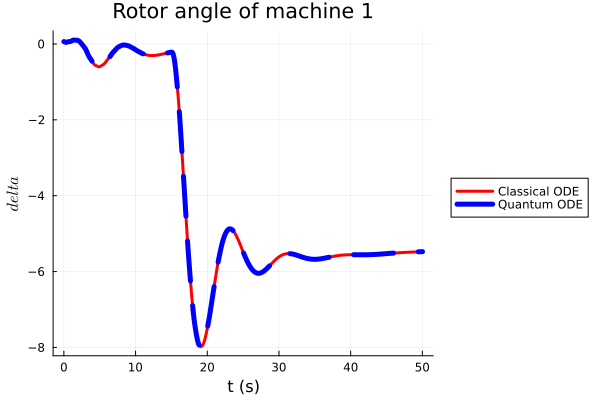

In [8]:
time_array = 0.0:0.01:50.02
p = plot(time_array, [sol1[:,7]; sol2[:,7]], title = "Rotor angle of machine 1", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,7]; qsol2[:,7]], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"delta")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

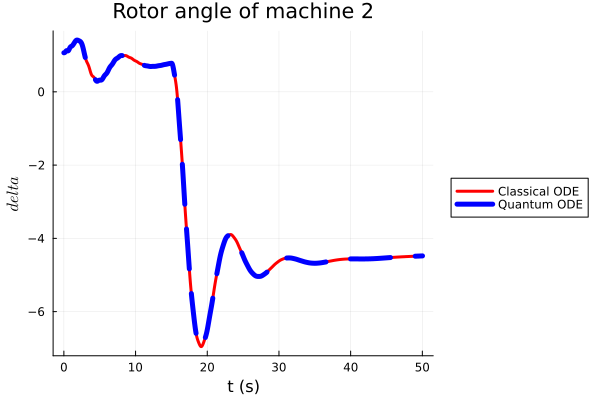

In [9]:
p = plot(time_array, [sol1[:,8]; sol2[:,8]], title = "Rotor angle of machine 2", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,8]; qsol2[:,8]], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"delta")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

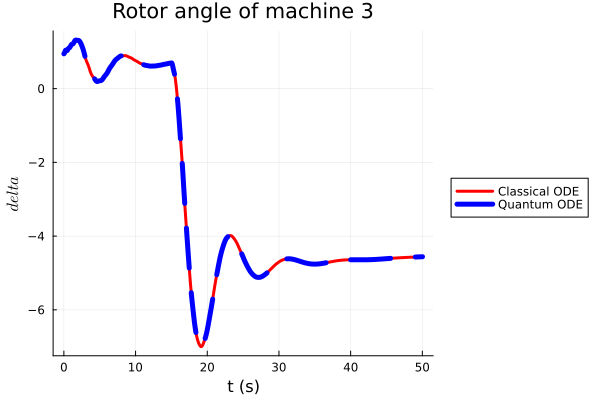

In [10]:
p = plot(time_array, [sol1[:,9]; sol2[:,9]], title = "Rotor angle of machine 3", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,9]; qsol2[:,9]], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"delta")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

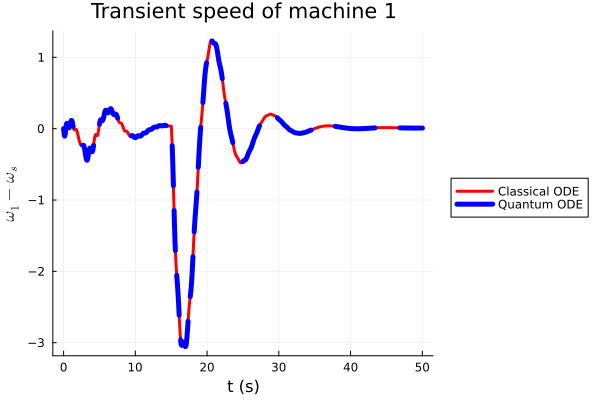

In [11]:
p = plot(time_array, [sol1[:,10].-omega_s; sol2[:,10].-omega_s], title = "Transient speed of machine 1", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,10].-omega_s; qsol2[:,10].-omega_s], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"\omega_1 - \omega_s")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

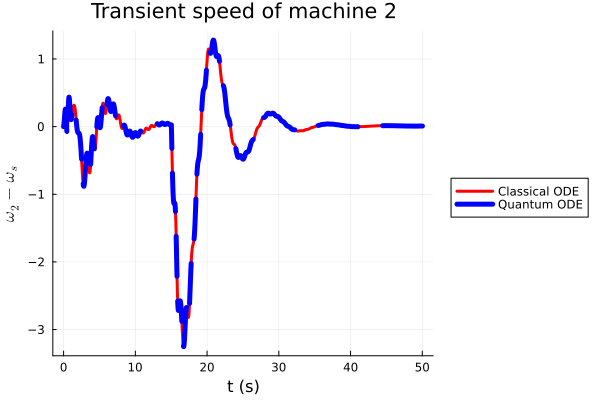

In [12]:
p = plot(time_array, [sol1[:,11].-omega_s; sol2[:,11].-omega_s], title = "Transient speed of machine 2", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,11].-omega_s; qsol2[:,11].-omega_s], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"\omega_2 - \omega_s")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

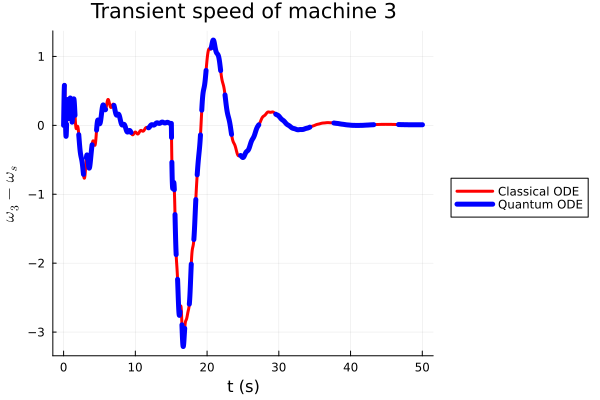

In [13]:
p = plot(time_array, [sol1[:,12].-omega_s; sol2[:,12].-omega_s], title = "Transient speed of machine 3", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,12].-omega_s; qsol2[:,12].-omega_s], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"\omega_3 - \omega_s")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

## Large disterbance

#### Modified system for large disturbance

In [14]:
#Large changing of load.
eq13 = [0 ~ Pc[1] - data["PC"][1] + data["pf_large"][1]*(DL),
    0 ~ Pc[2] - data["PC"][2] + data["pf_large"][2]*(DL),
    0 ~ Pc[3] - data["PC"][3] + data["pf_large"][3]*(DL)]
eqs = [eq1; eq2; eq3; eq4; eq5; eq6; eq7; eq8; eq9; eq10; eq11; eq12; eq13];

#### Classical ODE

In [15]:
#Create the ODE system
@named three_machine = ODESystem(eqs)
three_machine_simp = structural_simplify(three_machine)
prob1 = ODEProblem(three_machine_simp,u01,tspan1,p1);
sol1 = solve(prob1,Trapezoid(),dt = h, adaptive = false)
u02 = sol1.u[end]
prob2 = ODEProblem(three_machine_simp,u02,tspan2,p3);
sol2 = solve(prob2,Trapezoid(),dt = h, adaptive = false);

#### Quantum ODE

In [16]:
k = 2
qsol1 = solve(prob1,QuNLDE(k,h),dt = h, adaptive = false)
u02 = qsol1.u[end]
prob2 = ODEProblem(three_machine_simp,u02,tspan2,p3);
qsol2 = solve(prob2,QuNLDE(k,h),dt = h, adaptive = false);

#### Save the results.

In [17]:
open("results/TMIB/TMIB_ODE_large.csv", "w") do f
    CSV.write(f,[], writeheader=true, header=header)
end
open("results/TMIB/TMIB_quan_large.csv", "w") do f
    CSV.write(f,[], writeheader=true, header=header)
end

sol1 = transpose(sol1)
sol2 = transpose(sol2)
df_sol1 = DataFrame(sol1, :auto)
df_sol2 = DataFrame(sol2, :auto)
CSV.write("results/TMIB/TMIB_ODE_large.csv", df_sol1,append = true)
CSV.write("results/TMIB/TMIB_ODE_large.csv", df_sol2,append = true)

qsol1 = transpose(qsol1)
qsol2 = transpose(qsol2)
df_qsol1 = DataFrame(qsol1, :auto)
df_qsol2 = DataFrame(qsol2, :auto);
CSV.write("results/TMIB/TMIB_quan_large.csv", df_qsol1,append = true)
CSV.write("results/TMIB/TMIB_quan_large.csv", df_qsol2,append = true);

#### Plot the results.

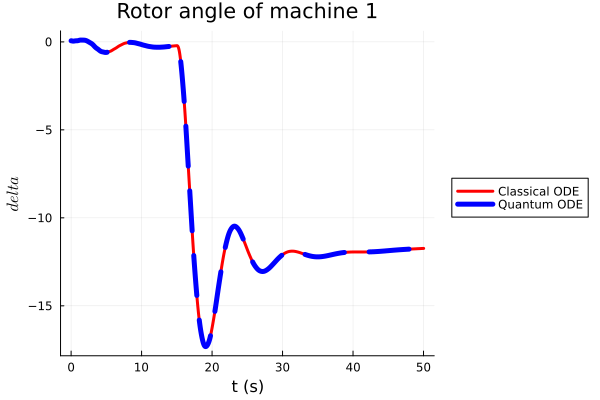

In [18]:
p = plot(time_array, [sol1[:,7]; sol2[:,7]], title = "Rotor angle of machine 1", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,7]; qsol2[:,7]], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"delta")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

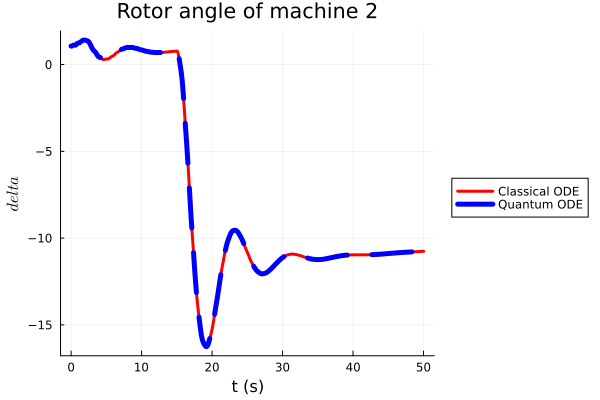

In [19]:
p = plot(time_array, [sol1[:,8]; sol2[:,8]], title = "Rotor angle of machine 2", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,8]; qsol2[:,8]], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"delta")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

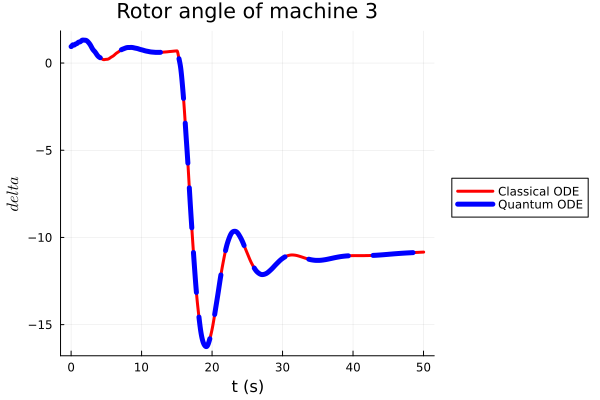

In [20]:
p = plot(time_array, [sol1[:,9]; sol2[:,9]], title = "Rotor angle of machine 3", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,9]; qsol2[:,9]], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"delta")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

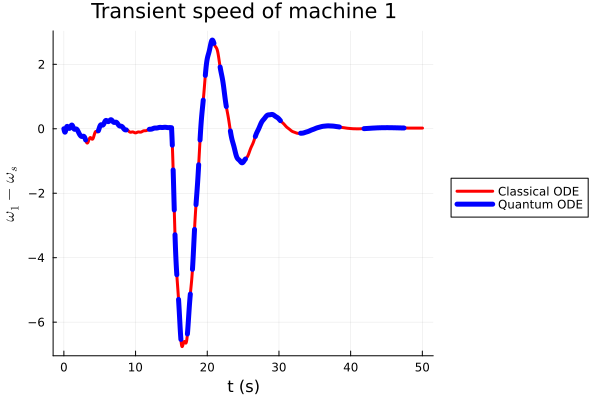

In [21]:
p = plot(time_array, [sol1[:,10].-omega_s; sol2[:,10].-omega_s], title = "Transient speed of machine 1", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,10].-omega_s; qsol2[:,10].-omega_s], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"\omega_1 - \omega_s")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

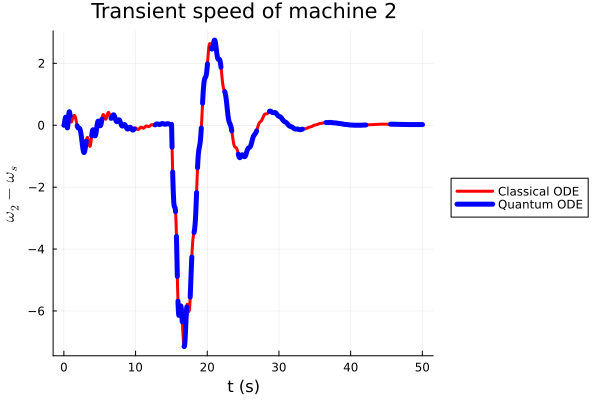

In [22]:
p = plot(time_array, [sol1[:,11].-omega_s; sol2[:,11].-omega_s], title = "Transient speed of machine 2", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,11].-omega_s; qsol2[:,11].-omega_s], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"\omega_2 - \omega_s")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

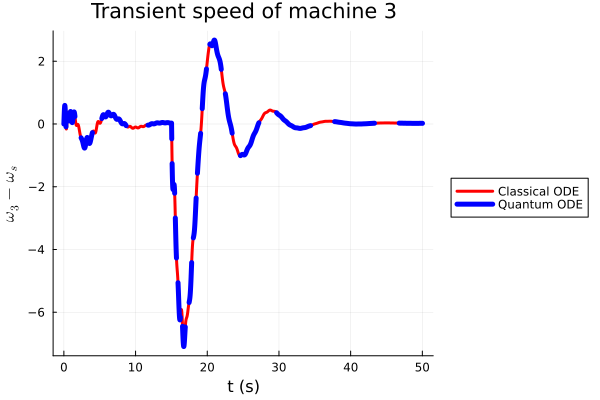

In [23]:
p = plot(time_array, [sol1[:,12].-omega_s; sol2[:,12].-omega_s], title = "Transient speed of machine 3", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, [qsol1[:,12].-omega_s; qsol2[:,12].-omega_s], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                                      # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"\omega_3 - \omega_s")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()